In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

import librosa

import os

In [8]:
pt1 = "4911-3-0-0.wav"
pt2 = "15564-2-0-1.wav"

https://towardsdatascience.com/get-to-know-audio-feature-extraction-in-python-a499fdaefe42

# Librosa.

In [9]:
def librosaa(pt,num_features):
    y, sr = librosa.load(pt)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc= num_features)
    #print(mfccs)

    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
                            
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(nrows=2, sharex=True)
    img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max), 
                    x_axis='time', y_axis='mel', fmax=8000, ax=ax[0])
    fig.colorbar(img, ax=[ax[0]])
    ax[0].set(title='Mel spectrogram')
    ax[0].label_outer()
    img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
    fig.colorbar(img, ax=[ax[1]])
    ax[1].set(title='MFCC')
    

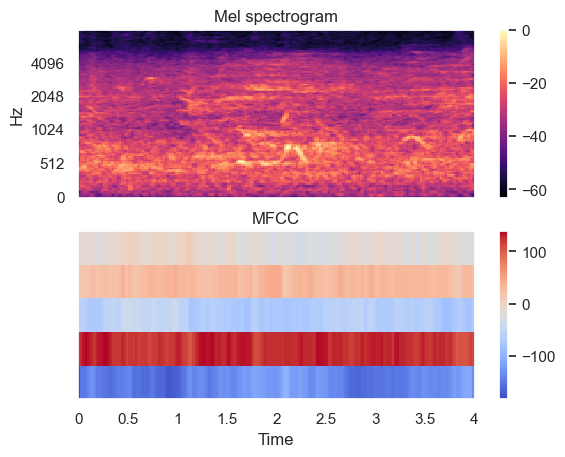

In [10]:
import librosa
import librosa.display

librosaa(pt2, 5)

# Pydub

Channels: number of channels; 1 for mono, 2 for stereo audio  
Sample width: number of bytes per sample; 1 means 8-bit, 2 means 16-bit  
Frame rate/Sample rate: frequency of samples used (in Hertz)  
Frame width: Number of bytes for each “frame”. One frame contains a sample for each channel.  
Length: audio file length (in milliseconds)  
Frame count: the number of frames from the sample  
Intensity: loudness in dBFS (dB relative to the maximum possible loudness)  

In [11]:
def pydubb(pt):
    # Load files
    audio_segment = AudioSegment.from_file(pt)
    # Print attributes
    print(f"Channels: {audio_segment.channels}")
    print(f"Sample width: {audio_segment.sample_width}")
    print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
    print(f"Frame width: {audio_segment.frame_width}")
    print(f"Length (ms): {len(audio_segment)}")
    print(f"Frame count: {audio_segment.frame_count()}")
    print(f"Intensity: {audio_segment.dBFS}")


In [12]:
from pydub import AudioSegment

pydubb(pt1)

Channels: 2
Sample width: 2
Frame rate (sample rate): 44100
Frame width: 4
Length (ms): 209
Frame count: 9231.0
Intensity: -15.767938472117212


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


# Using Wave

In [13]:
def wavee(pt):
    # Open wav file and read frames as bytes
    sf_filewave = wave.open(pt, 'r')
    signal_sf = sf_filewave.readframes(-1)
    # Convert audio bytes to integers
    soundwave_sf = np.frombuffer(signal_sf, dtype='int16')
    # Get the sound wave frame rate
    framerate_sf = sf_filewave.getframerate()
    # Find the sound wave timestamps
    time_sf = np.linspace(start=0,
                        stop=len(soundwave_sf)/framerate_sf,
                        num=len(soundwave_sf))
    # Set up plot
    f, ax = plt.subplots(figsize=(9,3))
    # Setup the title and axis titles
    plt.title('Amplitude over Time')
    plt.ylabel('Amplitude')
    plt.xlabel('Time (seconds)')
    # Add the audio data to the plot
    plt.plot(time_sf, soundwave_sf, label='Warm Memories', alpha=0.5)
    plt.legend()
    plt.show()

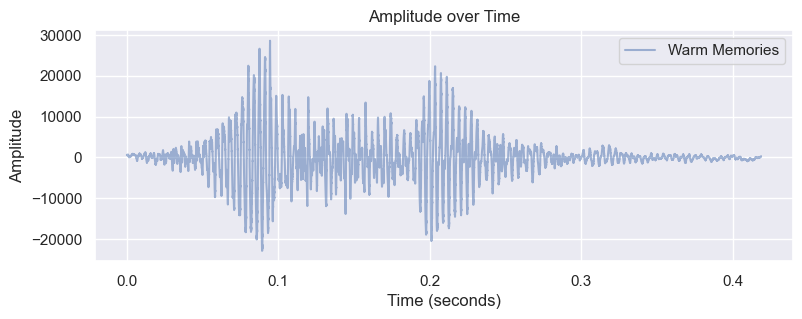

In [14]:
import wave

wavee(pt1)


THe video i saw
  
  github i saw https://github.com/Briggs599/audio_data_DolbyIO/blob/main/analysis.ipynb  
https://medium.com/hacking-media/extracting-features-from-audio-samples-for-machine-learning-7b6a9271984

In [15]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures
import matplotlib.pyplot as plt

In [16]:
def pyaudio(pt):
    [Fs, x] = audioBasicIO.read_audio_file(pt)
    F, f_names = ShortTermFeatures.feature_extraction(x[:,0], Fs, 0.050*Fs, 0.025*Fs)
    plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[0]) 
    plt.subplot(2,1,2); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]); plt.show()

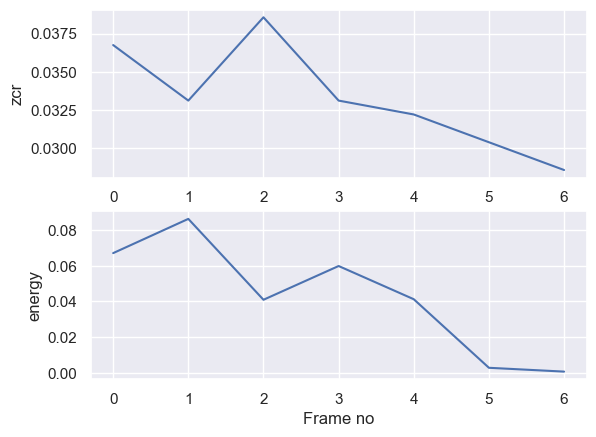

In [17]:
pyaudio(pt1)

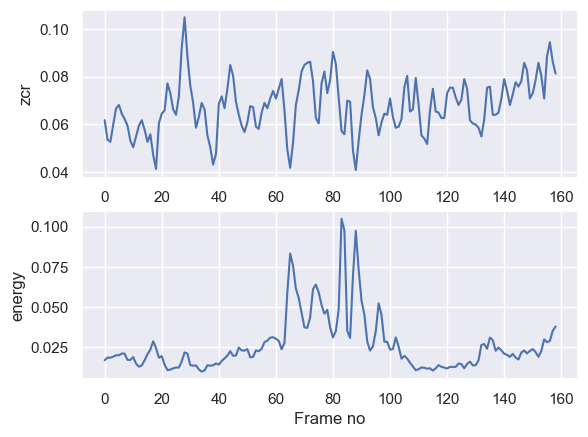

In [18]:
pyaudio(pt2)

In [36]:
y, sr = librosa.load(pt2)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc= 20)
print(mfccs.shape)

df = pd.DataFrame(mfccs.T)
df.head()

(20, 173)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-183.364517,121.508255,-62.384377,11.955788,-5.736265,-18.503361,-17.633816,-5.607575,-17.772480,5.053039,-18.924524,8.534212,-5.615862,-8.921469,-2.156770,6.365956,9.892469,0.787125,-6.952284,-0.425035
1,-149.686707,125.455185,-61.161316,16.441658,-9.504534,-17.893398,-19.004772,-6.972878,-14.865105,3.765130,-12.847830,13.716797,-2.511567,-7.181275,-6.541690,0.696709,6.732072,-4.848390,-11.052735,-3.477978
2,-150.054230,134.368378,-61.753399,18.136471,-12.498190,-14.922264,-17.483925,-12.518614,-15.446709,3.643518,-8.387957,11.886124,-5.825821,-3.064044,-5.677030,1.768481,8.124747,-4.271951,-12.239649,-1.956107
3,-149.212738,137.446869,-65.035759,19.698317,-13.699924,-14.026543,-11.884975,-13.975355,-12.237848,3.794708,-11.428840,8.688114,-5.448823,-0.945594,1.686455,3.689668,6.945401,-0.774495,-3.917380,0.290925
4,-140.857040,134.854813,-70.621567,17.697357,-14.102366,-12.399517,-11.700748,-15.595127,-9.010036,1.018670,-11.814388,5.249413,-7.092587,-2.384444,-0.606199,0.867555,2.229217,-1.612343,-4.760784,-3.138165


In [37]:
y, sr = librosa.load(pt1)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc= 20)
print(mfccs.shape)

df = pd.DataFrame(mfccs.T)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-240.192780,157.807144,-50.931782,-23.132740,22.785709,-16.996162,-29.345976,5.488319,-25.798395,1.897016,-1.903029,11.564680,-1.145977,18.147739,9.830982,3.266330,13.797495,13.757992,-2.304208,6.176785
1,-152.617493,159.988281,-69.636002,-29.309774,14.035069,-30.982645,-37.986584,-2.263573,-33.875061,6.542511,0.359011,19.519855,11.794638,31.838835,23.023436,13.438585,6.485667,2.314871,-14.684875,-10.225800
2,-116.308640,148.687622,-80.976990,-34.002293,3.390370,-30.504677,-41.016357,2.982863,-27.324402,8.096236,4.998468,21.948196,24.646370,38.241592,25.262699,15.481018,5.529875,-3.372741,-12.493196,-16.623205
3,-114.653175,144.386581,-77.908157,-35.101238,-4.144736,-28.137726,-34.918747,7.840506,-21.509792,8.668406,0.449737,25.849617,22.705338,32.106697,16.513884,6.089474,4.038327,-0.185206,-6.920341,-13.014614
4,-128.468414,149.441284,-75.056549,-40.806053,-10.865418,-27.939569,-20.579733,7.092334,-23.848888,-0.303606,-7.575341,30.287073,23.070683,40.220074,22.722376,0.506193,-4.895728,-3.494590,-5.136178,-2.742741
